## Observations and Insights 

In [1]:
'1. Capomulin and Ramicane appear to be the most effective drug regimens.'
'2. The pool of mice is almost 50-50 female and male, negating most issues concerning gender bias'
'3. The longer a mouse is treated with Capomulin, the smaller the tumor gets.'

'3. The longer a mouse is treated with Capomulin, the smaller the tumor gets.'

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df=pd.merge(
    mouse_metadata, study_results, on="Mouse ID"
)

# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
combined_data_df['Mouse ID'].count()

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_group=combined_data_df.groupby('Timepoint')
mouse_group['Mouse ID'].describe()

,count,unique,top,freq
Timepoint,,,,
0,250,249,g989,2
5,238,237,g989,2
10,223,222,g989,2
15,207,206,g989,2
20,195,194,g989,2
25,183,183,j984,1
30,171,171,j984,1
35,154,154,j984,1
40,142,142,j984,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_group=combined_data_df.drop_duplicates(subset=['Timepoint', 'Mouse ID'])
clean_group

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_group['Mouse ID'].count()

1888

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group=clean_group.groupby('Drug Regimen')

means=regimen_group['Tumor Volume (mm3)'].mean()
medians=regimen_group['Tumor Volume (mm3)'].median()
variances=regimen_group['Tumor Volume (mm3)'].var()
standard_dev=regimen_group['Tumor Volume (mm3)'].std()
standard_err_mean=regimen_group['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_df=pd.DataFrame({
    "Mean": means,
    "Medians": medians,
    "Variances": variances,
    "Standard Dev": standard_dev,
    "SEM": standard_err_mean    
})
summary_df

,Mean,Medians,Variances,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_df=regimen_group['Tumor Volume (mm3)'].agg(['mean','median', 'var', 'std', 'sem'])
agg_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

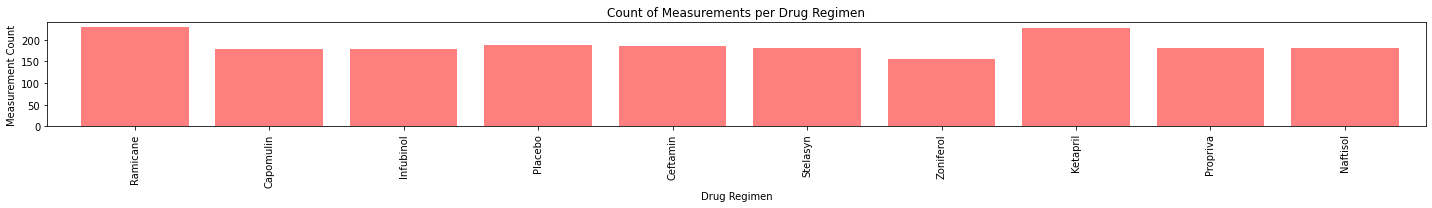

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

new_group=regimen_group.count()

x_axis = np.arange(len(new_group))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize=(20,3))
plt.bar(x_axis, new_group["Timepoint"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, clean_group["Drug Regimen"].unique(), rotation="vertical")

plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(new_group["Timepoint"])+10)

plt.title("Count of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurement Count")

plt.tight_layout()
plt.savefig("../Images/bar_plot_pandas.png")
plt.show()


Text(0, 0.5, 'Measurement Count')

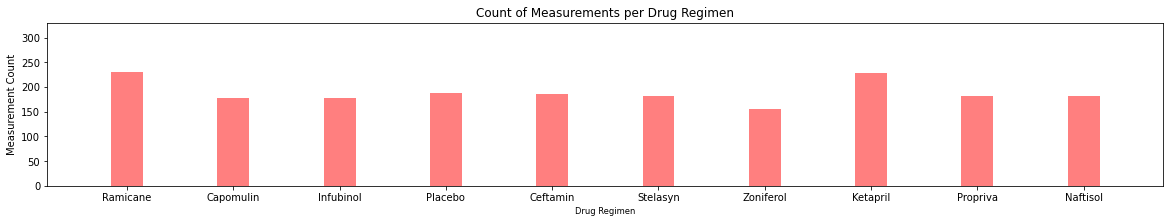

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = np.arange(len(new_group))

plt.figure(figsize=(20,3))
plt.bar(x_axis, new_group['Timepoint'], width=0.3, color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, clean_group['Drug Regimen'].unique())

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(new_group['Timepoint'])+100)

plt.title("Count of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen", fontsize='small')
plt.ylabel("Measurement Count")


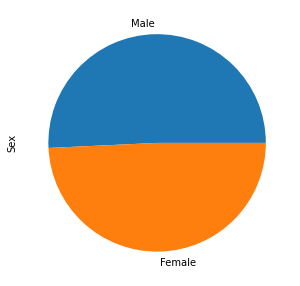

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_data=clean_group['Sex'].value_counts()
female_count=pie_data['Female']
male_count=pie_data['Male']

pi_plot = pie_data.plot.pie(y=[female_count, male_count], figsize=(5, 5))


(-1.1179900164988374,
 1.1067252436799584,
 -1.1132609815137346,
 1.1081858927805142)

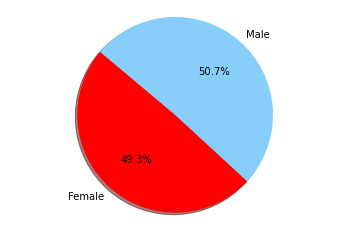

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


labels = ["Female", "Male"]

sizes = [ female_count, male_count ]

colors = ["red", "lightskyblue"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
only_four_regimen = clean_group.loc[
    (clean_group["Drug Regimen"] == "Capomulin") | 
    (clean_group["Drug Regimen"] =="Ramicane") | 
    (clean_group["Drug Regimen"] =="Infubinol") | 
    (clean_group["Drug Regimen"] =="Ceftamin"), :]
only_four_mouse=only_four_regimen.groupby('Mouse ID')
last_timepoint=pd.DataFrame(only_four_mouse['Timepoint'].max())
last_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_tumor_volume=pd.merge(
    clean_group, last_timepoint, on="Mouse ID"
)
last_timepoint_tumor_volume = last_timepoint_tumor_volume.rename(columns=
    {'Timepoint_x': 'Timepoint', 'Timepoint_y': 'Last Timepoint'})
last_timepoint_tumor_volume=last_timepoint_tumor_volume.loc[
    last_timepoint_tumor_volume['Timepoint'] == last_timepoint_tumor_volume['Last Timepoint'], :]
last_timepoint_tumor_volume

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
773,x822,Ceftamin,Male,3,29,45,61.386660,3,45
783,y163,Infubinol,Female,17,27,45,67.685569,3,45
793,y769,Ceftamin,Female,6,27,45,68.594745,4,45
803,y865,Ceftamin,Male,23,26,45,64.729837,3,45


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[ ]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
# Locate the rows which contain mice on each drug and get the tumor volumes
mice_tumor_vol=last_timepoint_tumor_volume['Tumor Volume (mm3)']
tumor_vol_data=mice_tumor_vol
    
# add subset 
quartiles = tumor_vol_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(iqr)
    
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
print(lower_bound)
upper_bound = upperq + (1.5*iqr)
print(upper_bound)
    

22.74251795250001
3.0739668737499812
94.04403868375002


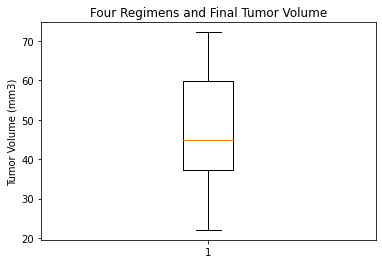

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Four Regimens and Final Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data)
plt.show()

## Line and Scatter Plots

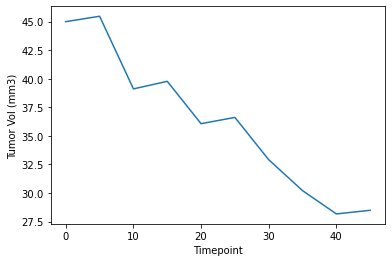

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_selection=clean_group.loc[
    clean_group['Mouse ID'] == 'x401', :]
x401_tumor_vol=mouse_selection['Tumor Volume (mm3)']
x401_time_point=mouse_selection['Timepoint']

plt.xlabel("Timepoint")
plt.ylabel("Tumor Vol (mm3)")

plt.plot(x401_time_point, x401_tumor_vol)
plt.show()


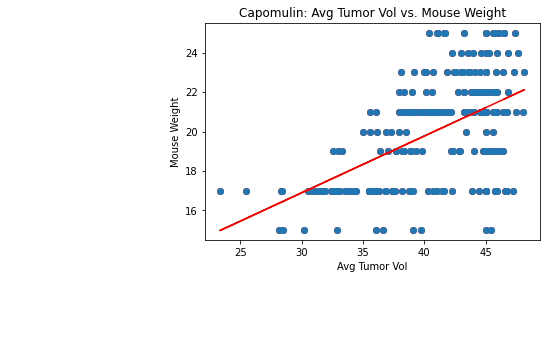

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_regimen=clean_group.loc[
    clean_group['Drug Regimen'] == "Capomulin", :]
tumor_vol=cap_regimen['Tumor Volume (mm3)']
mouse_weight=cap_regimen['Weight (g)']

plt.title("Capomulin: Avg Tumor Vol vs. Mouse Weight")
plt.xlabel("Avg Tumor Vol")
plt.ylabel("Mouse Weight")

plt.scatter(tumor_vol, mouse_weight, marker="o", color="red")


x_values = tumor_vol
y_values = mouse_weight
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(tumor_vol,mouse_weight)
correlation_coeff=round(correlation[0],2)
print(correlation_coeff)

x_values = tumor_vol
y_values = mouse_weight
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


0.53
y = 0.29x + 8.27
